In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("UCI_Credit_Card.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [4]:
data.shape

(30000, 25)

In [5]:
df=data.copy()

In [6]:
#Exploratory data analysis

<AxesSubplot:xlabel='SEX', ylabel='count'>

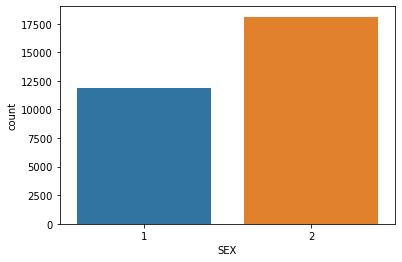

In [7]:
#Univariate analysis
sns.countplot(data["SEX"])

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

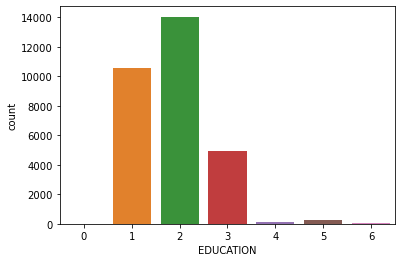

In [8]:
sns.countplot(data["EDUCATION"])

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

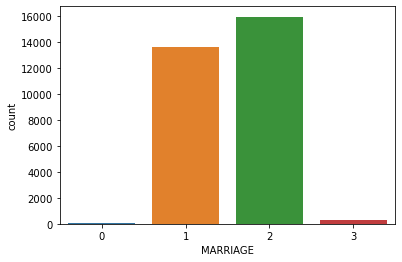

In [9]:
sns.countplot(data["MARRIAGE"])

<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

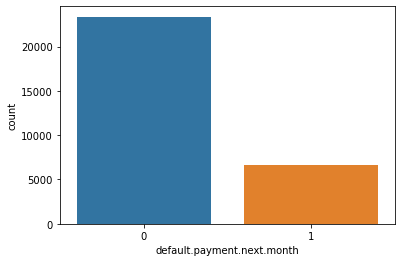

In [10]:
sns.countplot(data["default.payment.next.month"])

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

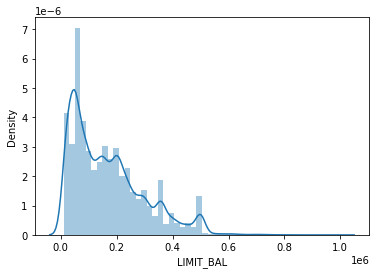

In [11]:
sns.distplot(data["LIMIT_BAL"])

<AxesSubplot:xlabel='AGE', ylabel='Density'>

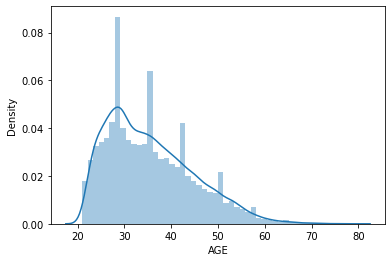

In [12]:
sns.distplot(data["AGE"])

In [13]:
data["default.payment.next.month"].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

<AxesSubplot:xlabel='SEX', ylabel='count'>

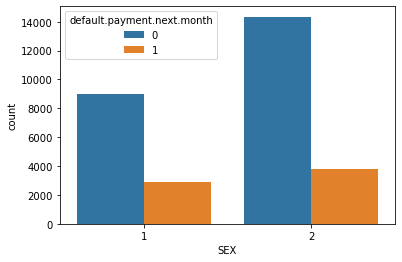

In [14]:
#Bivariate analysis
sns.countplot(x="SEX",hue="default.payment.next.month",data=data)

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

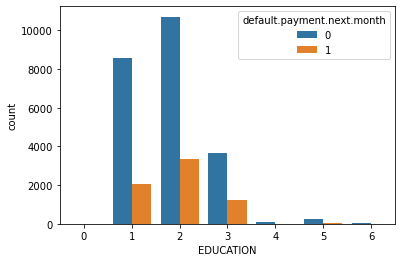

In [15]:
sns.countplot(x="EDUCATION",hue="default.payment.next.month",data=data)

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

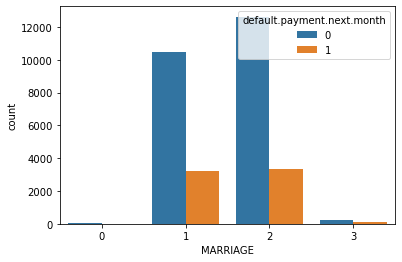

In [16]:
sns.countplot(x="MARRIAGE",hue="default.payment.next.month",data=data)

<AxesSubplot:>

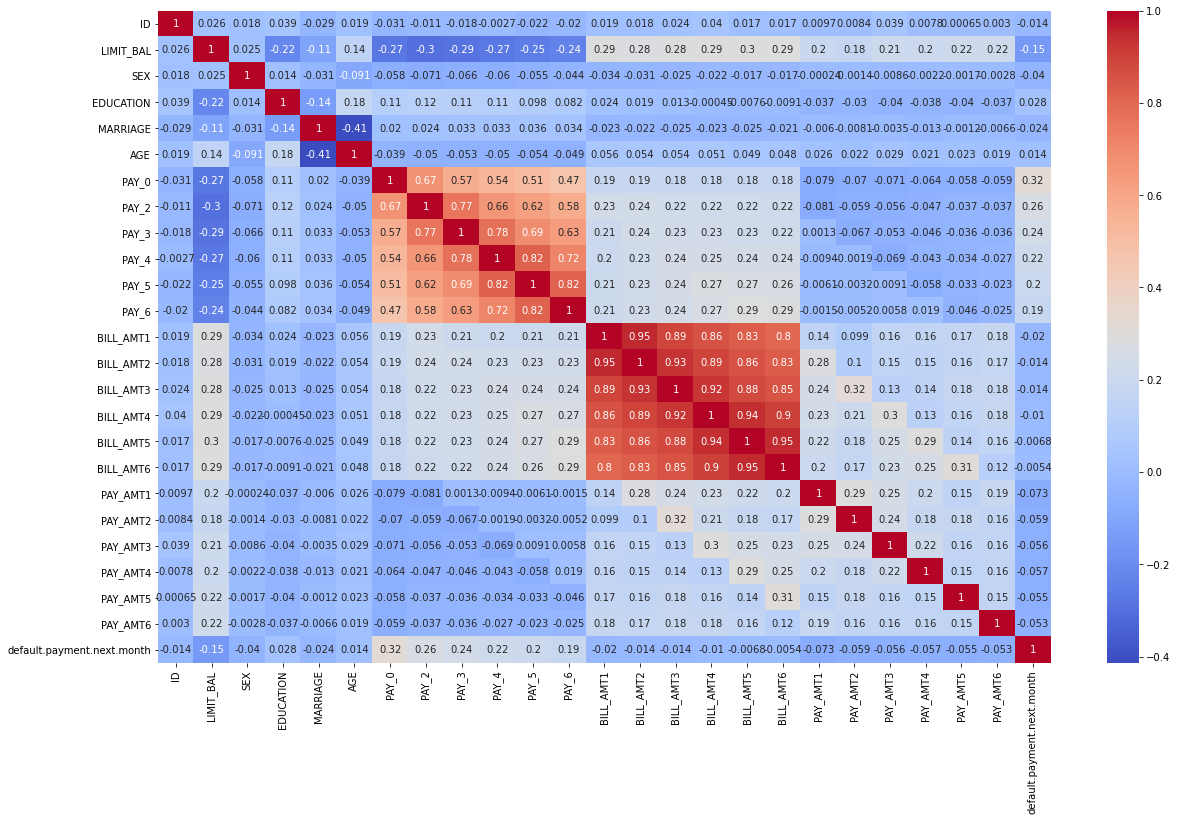

In [17]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),cmap="coolwarm",annot=True)

In [18]:
#Dropping unwanted features
data.drop(["ID","LIMIT_BAL","SEX","EDUCATION","AGE","MARRIAGE"],axis=1,inplace=True)

In [19]:
#Scaling the data
sc=StandardScaler()
for i in data.columns[:-1]:
    data[[i]]=sc.fit_transform(data[[i]])

In [20]:
final=data.copy()

In [21]:
data

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0
29996,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0
29997,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1
29998,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1


In [22]:
x=data.drop("default.payment.next.month",axis=1)
y=data["default.payment.next.month"]

In [23]:
#Oversampling the data
smote = SMOTE()
a,b = smote.fit_resample(x,y)

<AxesSubplot:xlabel='default.payment.next.month', ylabel='count'>

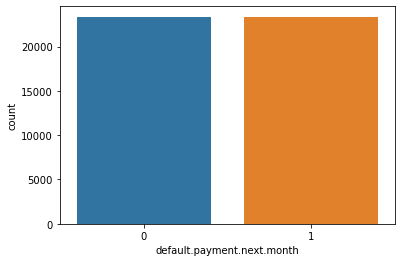

In [24]:
sns.countplot(b)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [27]:
(x_test)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
23491,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.292761,-0.283059,-0.254774,-0.219766,-0.171925,-0.165495,-0.235500,-0.184248,-0.214105,-0.232101,-0.245017,-0.203829
839,0.904712,-1.558876,-1.532192,-1.521944,-1.530046,-1.486041,-0.695642,-0.690983,-0.677929,-0.672497,-0.663059,-0.652724,-0.341942,-0.256990,-0.296801,-0.308063,-0.314136,-0.293382
41486,-1.764843,-1.558876,-1.532192,-1.521944,-1.530046,-1.486041,-0.619982,-0.623090,-0.585175,-0.587279,-0.601756,-0.597451,-0.047499,0.023977,0.016887,-0.069158,-0.097767,-0.098146
33003,1.794564,1.782348,2.645450,2.754781,2.882360,2.861905,-0.681382,-0.676231,-0.662788,-0.656176,-0.645788,-0.635093,-0.341942,-0.256990,-0.296801,-0.308063,-0.314136,-0.293382
6120,1.794564,0.111736,0.138865,0.188746,0.234917,0.253137,0.337323,0.339849,0.344952,0.150471,0.175333,0.198298,-0.160815,-0.105083,0.012741,0.068552,-0.111231,-0.144314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35806,0.904712,1.782348,0.138865,0.188746,0.234917,1.992316,-0.266594,-0.252933,-0.331988,-0.298478,-0.255735,-0.258681,-0.311896,-0.195959,-0.226916,-0.185718,-0.314136,-0.204565
34041,0.014861,0.111736,1.809921,0.188746,0.234917,0.253137,0.054162,0.141444,0.108089,0.196466,0.122185,0.187460,0.001336,-0.256990,-0.143779,-0.153096,-0.074528,-0.243159
26576,0.014861,0.111736,0.138865,0.188746,0.234917,-0.616452,-0.611402,-0.604813,-0.608684,-0.624527,-0.634669,-0.635681,-0.275891,-0.210333,-0.240005,-0.305828,-0.247701,-0.271444
16084,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.587473,-0.512305,-0.519078,-0.326432,-0.355292,-0.439268,0.426276,0.221386,0.967720,-0.283934,-0.297249,0.009253


In [28]:
def trained_model(m):
    model=m()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("Accuracy : ",model.score(x_test,y_test))
    print("f1 score : ",f1_score(y_test,y_pred))
    print("ROC Score : ",roc_auc_score(y_test,y_pred))
    print("Confusion matrix")
    print(confusion_matrix(y_test,y_pred))
    #define metrics
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    

In [29]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("cross_val_score : ","i".format(i),np.mean(cross_val_score(model,x_train,y_train)))

cross_val_score :  i 0.7399552241999418


In [30]:
model.tree_.max_depth

40

Accuracy :  0.6716242242670661
f1 score :  0.6647733478973238
ROC Score :  0.6716422096841252
Confusion matrix
[[3234 1435]
 [1634 3043]]


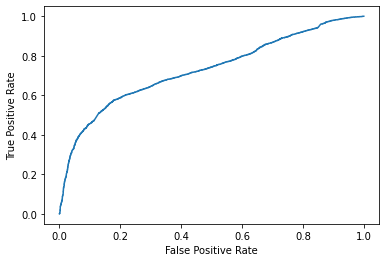

In [31]:
trained_model(LogisticRegression)

Accuracy :  0.7498395035309223
f1 score :  0.7565597667638485
ROC Score :  0.7498164232279536
Confusion matrix
[[3375 1294]
 [1044 3633]]


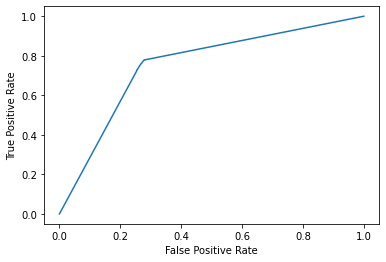

In [32]:
trained_model(DecisionTreeClassifier)

[21:22:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy :  0.788144660817462
f1 score :  0.7850629613547547
ROC Score :  0.7881575110914258
Confusion matrix
[[3750  919]
 [1061 3616]]


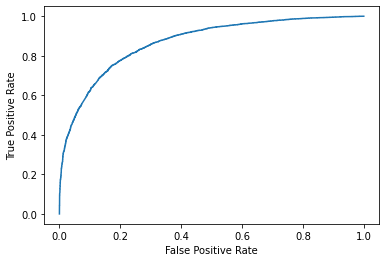

In [33]:
trained_model(XGBClassifier)

Accuracy :  0.8367215921249732
f1 score :  0.8348842241938975
ROC Score :  0.8367317303503476
Confusion matrix
[[3962  707]
 [ 819 3858]]


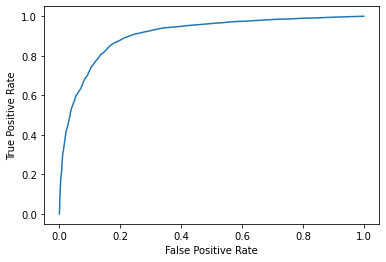

In [34]:
trained_model(RandomForestClassifier)

In [35]:
new=df.loc[7000:10000]
id=[i for i in new["ID"]]
new.drop(["ID","LIMIT_BAL","SEX","EDUCATION","AGE","MARRIAGE"],axis=1,inplace=True)
sc=StandardScaler()
for i in new.columns[:-1]:
    new[[i]]=sc.fit_transform(new[[i]])

In [36]:
new

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
7000,0.008637,0.109499,0.121269,0.194132,0.201103,0.220936,-0.418489,-0.385343,-0.335994,-0.460550,-0.631052,-0.608029,-0.260863,-0.250436,-0.262711,-0.297049,-0.316261,-0.298713,0
7001,-0.885139,-0.712015,-0.696545,-0.670244,-0.669763,-0.629101,-0.695993,-0.642572,-0.579717,-0.083431,-0.491760,-0.535328,-0.019398,0.174486,2.018680,0.419636,0.175624,-0.034086,0
7002,1.796189,1.752526,1.756896,1.922882,1.942836,1.921011,-0.002437,0.035319,0.106252,0.194967,0.239585,0.256802,-0.228469,-0.231148,-0.179512,-0.176226,-0.330097,-0.077730,0
7003,0.008637,0.109499,-1.514359,-1.534619,-1.540630,-1.479139,-0.548976,-0.721411,-0.715382,-0.690678,-0.684737,-0.665327,-0.358045,-0.359737,-0.312630,-0.310466,-0.330097,-0.304238,0
7004,-0.885139,-0.712015,-0.696545,-0.670244,1.942836,-0.629101,-0.318763,-0.708049,-0.701128,-0.655274,-0.666629,-0.635280,-0.301614,-0.303736,-0.176716,-0.310466,-0.214840,-0.286780,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,-1.778915,-1.533529,-1.514359,-1.534619,-1.540630,-1.479139,-0.671114,-0.721411,-0.715382,-0.690678,-0.684737,-0.665327,-0.358045,-0.359737,-0.312630,-0.310466,-0.330097,-0.304238,0
9997,0.008637,0.109499,0.121269,0.194132,0.201103,0.220936,1.358474,1.489055,1.616948,1.928720,2.449371,2.372382,0.058996,-0.038264,0.352964,1.506235,0.362900,-0.072206,0
9998,-0.885139,1.752526,1.756896,-1.534619,-1.540630,-1.479139,-0.718736,-0.709445,-0.715382,-0.690678,-0.684737,-0.665327,-0.358045,-0.359737,-0.312630,-0.310466,-0.330097,-0.304238,1
9999,0.008637,0.109499,0.121269,0.194132,0.201103,0.220936,-0.437081,-0.403614,-0.392175,-0.352482,-0.343246,-0.350087,-0.163681,-0.166853,-0.112952,-0.109207,-0.122551,-0.138501,0


In [37]:
#Let's check our model by taking some sample from the origional data
model=RandomForestClassifier()
model.fit(x_train,y_train)
testing=new.drop("default.payment.next.month",axis=1)
pred=model.predict(testing)
final_output=pd.DataFrame({"ID":id,"Actual":new["default.payment.next.month"],"Predicted":pred})
final_output

,ID,Actual,Predicted
7000,7001,0,0
7001,7002,0,0
7002,7003,0,1
7003,7004,0,0
7004,7005,0,0
...,...,...,...
9996,9997,0,0
9997,9998,0,0
9998,9999,1,1
9999,10000,0,0


In [38]:
m=[]
for i in range(3001):
    if final_output.iloc[i,1]==final_output.iloc[i,2]:
        m.append("True")
    else:
        m.append("False")
print("Predicted correctly :",m.count("True"))
print("Predicted incorrectly :",m.count("False"))

Predicted correctly : 2502
Predicted incorrectly : 499


In [39]:
final_output.drop("Actual",axis=1,inplace=True)

In [40]:
#ID's of customers who will repay their due amout within the time period
final_output[final_output["Predicted"]==1]

,ID,Predicted
7002,7003,1
7016,7017,1
7022,7023,1
7025,7026,1
7028,7029,1
...,...,...
9984,9985,1
9991,9992,1
9992,9993,1
9995,9996,1


In [41]:
#ID's of customers who will not repay their due amount within the time period
final_output[final_output["Predicted"]==0]

,ID,Predicted
7000,7001,0
7001,7002,0
7003,7004,0
7004,7005,0
7005,7006,0
...,...,...
9994,9995,0
9996,9997,0
9997,9998,0
9999,10000,0
